#Project 2
###James Grasell

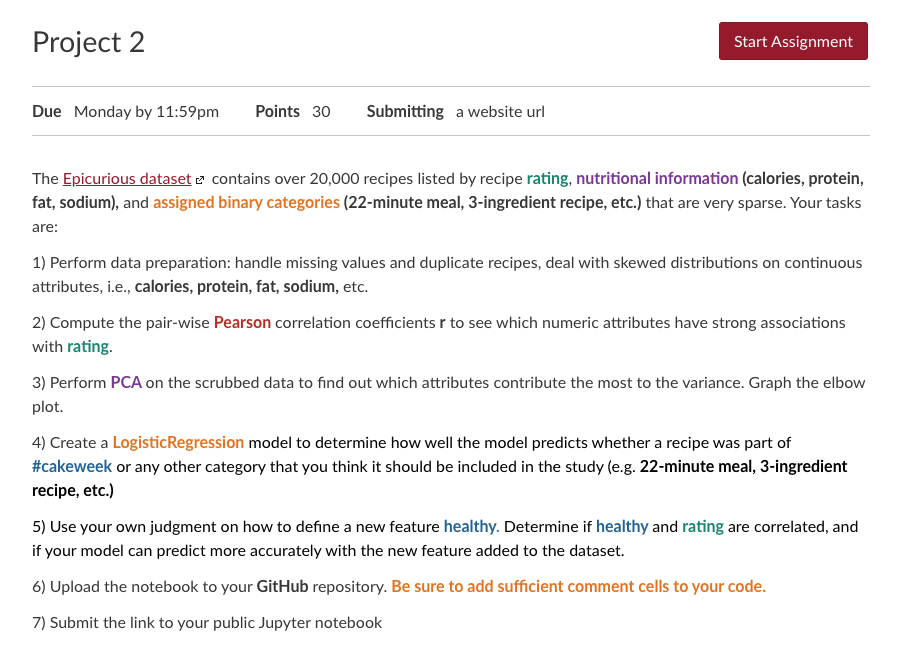

The Epicurious dataset contains 20,051 recipes listed by recipe rating, nutritional information (calories, protein,  fat, sodium), and assigned binary categories (22-minute meal, 3-ingredient recipe, etc.) that are very sparse.

###Analytical Steps

####Data Processing
1.   Load required libraries
2.   Read in the Epicurious dataset.
3.   Delete duplicate recipies.
3.   Examine descriptive statistics and distributions for all columns in the dataset.
4.   Impute missing data using the median (not sensitive to outliers) imputer.
6.   Rescale the features using PowerTransformer.
7.   Verify distributions are approximately normal bell shaped.








In [1]:
# Load in the required libraries for data processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the Epicurious dataset from github
url = 'https://raw.githubusercontent.com/jimgrasell/AML/master/Project02/Data/epi_r.csv'
df = pd.read_csv(url)
#df.head()
print('Shape of the dataframe: ',df.shape)

Shape of the dataframe:  (20052, 680)


In [3]:
# Remove duplicate recipies.
df.drop_duplicates(inplace=True)
print('Shape of the dataframe: ',df.shape)

Shape of the dataframe:  (18251, 680)


In [4]:
# Calculate and print the descriptive statistics for the numeric data in the dataframe
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df[['rating','calories','protein','fat','sodium']].describe()

,rating,calories,protein,fat,sodium
count,18251.00,14502.00,14470.00,14450.00,14501.00
mean,3.71,6622.10,92.23,363.39,6573.83
std,1.33,374781.93,3511.76,21357.70,348417.23
min,0.00,0.00,0.00,0.00,0.00
25%,3.75,205.00,3.00,8.00,88.00
50%,4.38,345.00,9.00,18.00,304.00
75%,4.38,599.00,28.00,34.00,732.00
max,5.00,30111218.00,236489.00,1722763.00,27675110.00


The results from the descriptive statistics table (above) indicate that approximately 20% of the data for calories, protein, fat, and sodium are missing. The max values compared to the means, 50th percentile (median), and the 75 percentile indicate extremely large outliers for calories, protein, fat, and sodium. Missing values will be imputed using the median imputer because the median is not sensitive to outliers.

(0.0, 6.0)

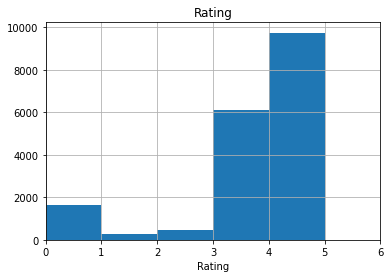

In [5]:
# Histograms for the numeric features

df['rating'].hist(bins=5)
plt.title('Rating')
plt.xlabel('Rating')
plt.xlim(0,6)

The ratings feature ranges from 1 to 5 with the majority score being a 4 or 5.

(0.0, 2000.0)

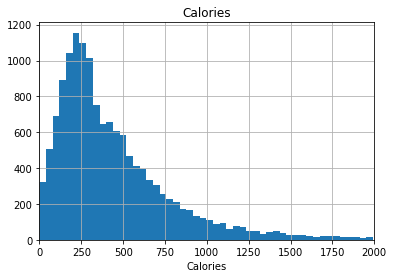

In [6]:
df['calories'][df['calories']<2000].hist(bins=50)
plt.title('Calories')
plt.xlabel('Calories')
plt.xlim(0,2000)

The calories feature is positively skewed with a median of 331. The long tail implies the presence of outliers.

(0.0, 100.0)

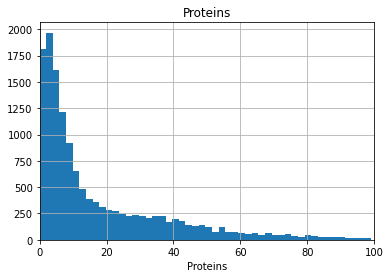

In [7]:
df['protein'][df['protein']<100].hist(bins=50)
plt.title('Proteins')
plt.xlabel('Proteins')
plt.xlim(0,100)

The proteins feature is positively skewed with a median of 8. The long tail implies the presence of outliers.

(0.0, 100.0)

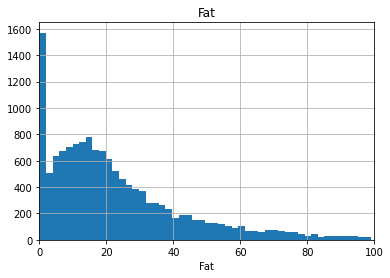

In [8]:
df['fat'][df['fat']<100].hist(bins=50)
plt.title('Fat')
plt.xlabel('Fat')
plt.xlim(0,100)

The fat feature is positively skewed with a median of 17. The long tail implies the presence of outliers.

(0.0, 2000.0)

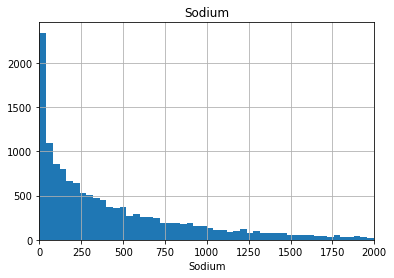

In [9]:
df['sodium'][df['sodium']<2000].hist(bins=50)
plt.title('Sodium')
plt.xlabel('Sodium')
plt.xlim(0,2000)

The sodium feature is positively skewed with a median of 294. The long tail implies the presence of outliers.

In [10]:
# Subset the dataframe so that the imputer can be used to replace missing data for ['calories','protein','fat','sodium'].
df_title = pd.DataFrame(df['title'])
df_num = df[['rating','calories','protein','fat','sodium']]
df_cat = df.drop(['title','rating','calories','protein','fat','sodium'], axis=1)

In [11]:
# Use the SimpleImputer to replace the missing data. The Median strategy is used since it is not sensitive to outliers.
# Note: About 20% of the data is missing. 20% is a high percentage and row deletion should be considered.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(df_num)

df_num_tr = imputer.transform(df_num)
df_num = pd.DataFrame(df_num_tr, columns=df_num.columns, index=df_num.index)

df_num.describe()

,rating,calories,protein,fat,sodium
count,18251.00,18251.00,18251.00,18251.00,18251.00
mean,3.71,5332.70,74.99,291.46,5285.58
std,1.33,334086.32,3127.07,19004.39,310575.10
min,0.00,0.00,0.00,0.00,0.00
25%,3.75,238.00,4.00,11.00,132.00
50%,4.38,345.00,9.00,18.00,304.00
75%,4.38,516.50,21.00,28.00,589.00
max,5.00,30111218.00,236489.00,1722763.00,27675110.00


In [12]:
# Recombine the data into the original structure
df = (df_title.join(df_num)).join(df_cat)
print('Shape of the dataframe: ',df.shape)

Shape of the dataframe:  (18251, 680)


In [13]:
# Convert ['calories','protein','fat','sodium'] to z-scores to standardize the scales and transform data to normal distributions.
# PowerTransformer is used because this algorithm is less sensitive to outliers.

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)
df_num_std = pd.DataFrame(pt.fit_transform(df[['calories','protein','fat','sodium']]), columns=('calories_pt','protein_pt','fat_pt','sodium_pt'))

df = df.join(df_num_std)

In [27]:
# Drop missing values after transforming the data.
df = df.dropna()
print('Shape of the dataframe: ',df.shape)

Shape of the dataframe:  (16731, 684)


In [28]:
# Correlations between rating and the numeric variables calories, protein, fat, and sodium

corr_matrix = df[['rating','calories_pt','protein_pt','fat_pt','sodium_pt']].corr()
corr_matrix['rating'].sort_values(ascending=False)

rating        1.00
protein_pt    0.01
fat_pt        0.01
calories_pt   0.01
sodium_pt     0.00
Name: rating, dtype: float64

The Pearson correlations between rating and the variables calories, protein, fat, and sodium are small (0.00 to 0.01) indicating that rating of a recipe does not depend on the levels of fat, protein, calories or sodium.

Text(0.5, 0, 'Calories')

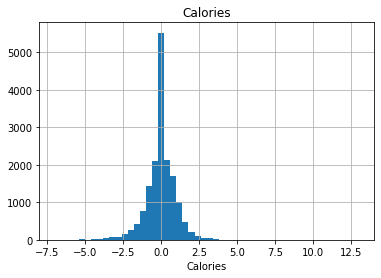

In [29]:
# The distributions of data are relatively normal/bell shaped after applying the PowerTransformer.

df['calories_pt'].hist(bins=50)
plt.title('Calories')
plt.xlabel('Calories')

Text(0.5, 0, 'Proteins')

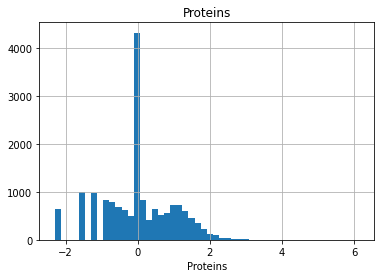

In [30]:
df['protein_pt'].hist(bins=50)
plt.title('Proteins')
plt.xlabel('Proteins')

Text(0.5, 0, 'Fat')

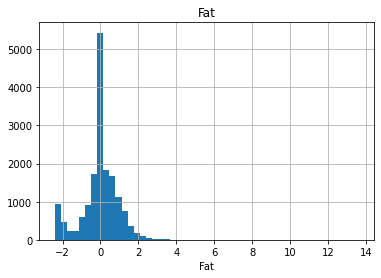

In [31]:
df['fat_pt'].hist(bins=50)
plt.title('Fat')
plt.xlabel('Fat')

Text(0.5, 0, 'Sodium')

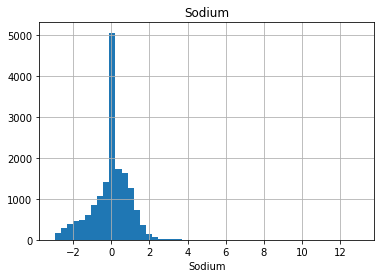

In [32]:
df['sodium_pt'].hist(bins=50)
plt.title('Sodium')
plt.xlabel('Sodium')

In [33]:
# Load Principal Component Analysis
from sklearn.decomposition import PCA

In [34]:
# Convert data into an array for PCA
df_pca = df[['calories_pt','protein_pt','fat_pt','sodium_pt']].values
df_pca

array([[ 0.26669594,  0.96707385, -0.67717668,  0.52490263],
       [ 0.20150725,  0.55633677,  0.31069932,  1.22231175],
       [-0.84854257, -0.33564473, -0.67717668, -0.29583406],
       ...,
       [ 0.59399855,  0.99313297,  0.76273825,  0.63464923],
       [ 0.72773916,  1.2861203 ,  0.34833599,  0.46974906],
       [ 0.58773043,  1.65668495, -0.39572653,  1.97595441]])

In [37]:
# Determine the cumulative variance of derived components
covar_matrix = PCA(n_components = 4)
covar_matrix.fit(df_pca)
variance = covar_matrix.explained_variance_ratio_
var = np.cumsum(np.round(variance, decimals=3)*100)
var

array([76.9, 89.7, 95.5, 99.9])

Text(0, 0.5, 'Explained Variance')

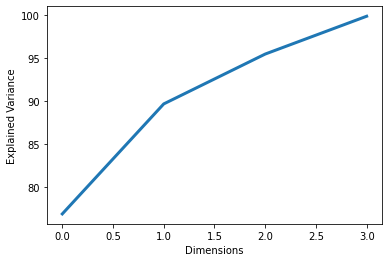

In [38]:
plt.figure(figsize=(6,4))
plt.plot(var, linewidth=3)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")

In [42]:
pca_reduced = covar_matrix.fit_transform(df_pca)
pca_reduced = pd.DataFrame(pca_reduced, columns = ('PC1','PC2','PC3','PC4'))
pca_reduced.head()

,PC1,PC2,PC3,PC4
0,0.52,0.66,-0.95,-0.36
1,1.10,0.82,0.14,-0.07
2,-1.09,0.38,-0.15,0.17
3,0.10,0.03,0.09,0.01
4,1.09,-0.11,-0.08,0.08


In [43]:
df = df.join(pca_reduced)

In [44]:
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,...,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,calories_pt,protein_pt,fat_pt,sodium_pt,PC1,PC2,PC3,PC4
0,"Lentil, Apple, and Turkey Wrap",2.50,426.00,30.00,7.00,559.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.27,0.97,-0.68,0.52,0.52,0.66,-0.95,-0.36
1,Boudin Blanc Terrine with Red Onion Confit,4.38,403.00,18.00,23.00,1439.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.56,0.31,1.22,1.10,0.82,0.14,-0.07
2,Potato and Fennel Soup Hodge,3.75,165.00,6.00,7.00,165.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.85,-0.34,-0.68,-0.30,-1.09,0.38,-0.15,0.17
3,Mahi-Mahi in Tomato Olive Sauce,5.00,345.00,9.00,18.00,304.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,-0.01,0.10,0.10,0.10,0.03,0.09,0.01
4,Spinach Noodle Casserole,3.12,547.00,20.00,32.00,452.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.64,0.61,0.38,1.09,-0.11,-0.08,0.08


In [45]:
from sklearn.linear_model import LogisticRegression

In [55]:
# Subset the dataset for Logistic Regression
df = df.dropna()

y = df['#cakeweek'].values
X = df[['PC1','PC2']].values

In [54]:
# Split the data into training and test data files
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Logistic Regression using PC1, PC2 to predict #cakeweek
LRG = LogisticRegression(
   random_state = 0,solver = 'liblinear',multi_class = 'auto'
).fit(X_train, y_train)

LRG.score(X_test, y_test)


1.0

The results indicate that the logistic regression model predicts #cakeweek with 99.9% accuracy. Obviously I did something wrong...